## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

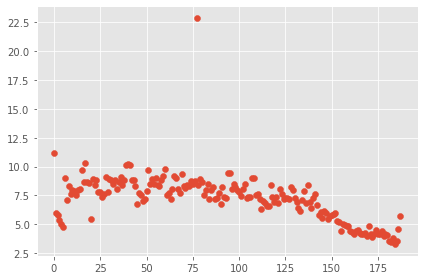

In [9]:
# Use this cell to begin your analysis, and add as many as you would like!
# Import pandas and matplotlib.pyplot
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")

# Read in the csv as a DataFrame
office_df = pd.read_csv('datasets/office_episodes.csv', parse_dates=['release_date'])
plt.scatter('episode_number','viewership_mil',data=office_df)


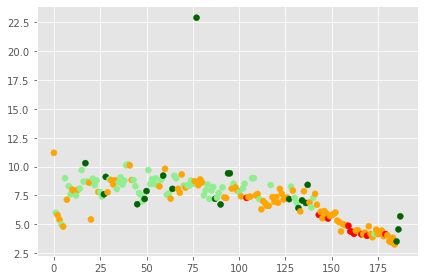

In [10]:
# Initiatlize two empty lists
cols = []

# Iterate through the DataFrame, and assign colors based on the rating
for  i,row in office_df.iterrows():
    if row['scaled_ratings'] < 0.25:
        cols.append('red')
    elif row['scaled_ratings'] < 0.50:
        cols.append('orange')
    elif row['scaled_ratings'] < 0.75:
        cols.append('lightgreen')
    else:
        cols.append('darkgreen')
office_df['color']=cols
plt.scatter('episode_number','viewership_mil',c='color',data=office_df)
plt.show()



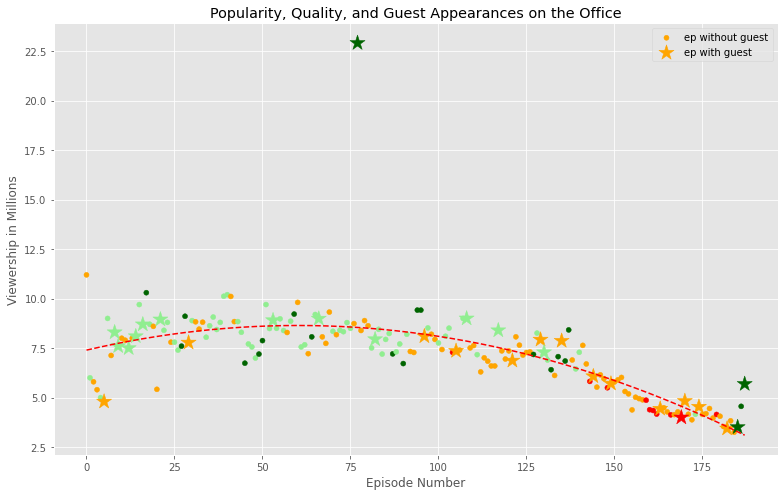

In [12]:

# Split data into guest and non_guest DataFrames
non_guest_df = office_df[office_df['has_guests'] == False]
guest_df = office_df[office_df['has_guests'] == True]

# Set the figure size and plot style        
plt.rcParams['figure.figsize'] = [11, 7]
# Create the figure
fig = plt.figure()

# Create two scatter plots with the episode number on the x axis, and the viewership on the y axis

# Create a normal scatter plot for regular episodes
plt.scatter(x=non_guest_df.episode_number, y=non_guest_df.viewership_mil,c=non_guest_df['color'], s=25)

# Create a starred scatterplot for guest star episodes
plt.scatter(x=guest_df.episode_number, y=guest_df.viewership_mil,c=guest_df['color'], marker='*', s=250)


plt.title("Popularity, Quality, and Guest Appearances on the Office")

plt.xlabel("Episode Number")


plt.ylabel("Viewership in Millions")
#make legends
plt.legend(['ep without guest','ep with guest'])
# Show the plot
z = np.polyfit(office_df['episode_number'],office_df['viewership_mil'] , 2)
p = np.poly1d(z)
plt.plot(office_df['episode_number'],p(office_df['episode_number']),"r--")
plt.show()



In [17]:
office_df[office_df['viewership_mil']==office_df['viewership_mil'].max()]

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings,color
77,77,5,Stress Relief,Dwight's too-realistic fire alarm gives Stanle...,9.7,8170,22.91,60,2009-02-01,"Cloris Leachman, Jack Black, Jessica Alba",Jeffrey Blitz,Paul Lieberstein,True,0.96875,darkgreen


Text(0.5, 1.0, 'number of views per season')

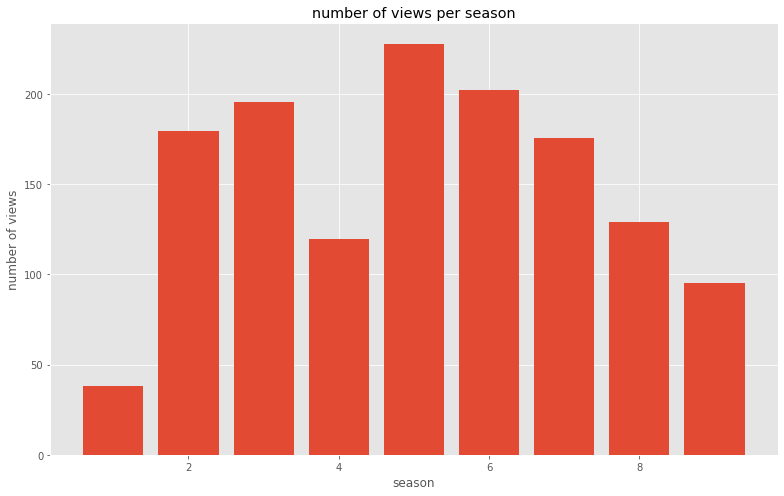

In [30]:
grouped_by_season = office_df.groupby('season')['viewership_mil'].sum().to_frame().reset_index()
plt.bar('season','viewership_mil',data=grouped_by_season)
plt.xlabel('season')
plt.ylabel('number of views')
plt.title('number of views per season')